In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 데이터 불러오기
data = pd.read_csv('C:/Users/galaxy/Desktop/2023/JB_Data/loan_customer.csv')
# 데이터 기본 정보 확인
data.info()    # 데이터 정보 출력 (데이터 타입, 누락값 확인)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24000 non-null  int64  
 1   NAME_CONTRACT_TYPE          24000 non-null  object 
 2   CODE_GENDER                 16906 non-null  object 
 3   FLAG_OWN_REALTY             14429 non-null  object 
 4   CNT_CHILDREN                24000 non-null  int64  
 5   AMT_INCOME_TOTAL            24000 non-null  float64
 6   AMT_CREDIT                  16700 non-null  float64
 7   NAME_INCOME_TYPE            24000 non-null  object 
 8   NAME_EDUCATION_TYPE         24000 non-null  object 
 9   NAME_FAMILY_STATUS          24000 non-null  object 
 10  NAME_HOUSING_TYPE           24000 non-null  object 
 11  REGION_POPULATION_RELATIVE  16851 non-null  float64
 12  DAYS_BIRTH                  19251 non-null  float64
 13  DAYS_EMPLOYED               168

In [2]:
data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
count,24000.000000,24000.000000,2.400000e+04,1.670000e+04,16851.000000,19251.000000,16851.000000,14267.000000,19259.000000,24000.0,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,17854.000000,15726.000000,16892.000000,24000.000000
mean,277994.337708,0.418083,1.725182e+05,5.954254e+05,0.020989,-16026.527453,63041.865112,-5016.930118,-2990.491926,1.0,...,0.076583,0.232042,0.181750,0.000167,0.709292,0.000125,49.942357,58.061950,60.368432,0.083042
std,102778.811383,0.727194,7.604604e+05,3.988125e+05,0.014061,4365.267387,140634.051334,3541.618561,1513.089981,0.0,...,0.265935,0.422144,0.385646,0.012909,0.454099,0.011180,13.095990,10.752802,8.682502,0.275951
min,100002.000000,0.000000,2.700000e+04,4.500000e+04,0.000290,-25197.000000,-16852.000000,-24672.000000,-6263.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.967147,0.000000
25%,188705.250000,0.000000,1.125000e+05,2.700000e+05,0.010006,-19647.000000,-2772.000000,-7537.000000,-4308.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.026337,50.801249,54.410659,0.000000
50%,277908.500000,0.000000,1.440000e+05,5.108535e+05,0.018850,-15731.000000,-1206.000000,-4521.000000,-3251.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.894802,57.935604,59.971539,0.000000
75%,366537.250000,1.000000,2.025000e+05,8.086500e+05,0.028663,-12376.500000,-299.000000,-2050.500000,-1717.500000,1.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,58.919900,65.184718,66.097419,0.000000
max,456228.000000,7.000000,1.170000e+08,4.050000e+06,0.072508,-7688.000000,365243.000000,0.000000,0.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.870790,98.987986,100.000000,1.000000


In [3]:
data.head()       # 데이터 상위 몇 개 행 출력

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
0,100002,Cash loans,M,Y,0,202500.0,NaN,Working,Secondary / secondary special,Single / not married,...,0,0,Business Entity Type 3,0,1,0,NaN,NaN,58.349224,1
1,100004,Revolving loans,NaN,NaN,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,...,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0
2,100020,Cash loans,M,N,0,108000.0,509602.5,Working,Secondary / secondary special,Married,...,1,0,Government,0,1,0,NaN,63.496369,NaN,0
3,100029,Cash loans,M,N,2,135000.0,NaN,Working,Secondary / secondary special,Married,...,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0
4,100048,Cash loans,NaN,Y,0,202500.0,604152.0,Working,Secondary / secondary special,Married,...,1,1,Industry: type 1,0,1,0,66.199985,NaN,NaN,0


In [4]:
# 결측치 확인
print("결측치가 있는 행의 수는",len(data),"중",len(data[data.isnull().any(axis=1)]))
# 대부분의 행이 결측치가 있음
missing_values = data.isnull().sum()
missing_values[missing_values > 0 ]

결측치가 있는 행의 수는 24000 중 23562


CODE_GENDER                   7094
FLAG_OWN_REALTY               9571
AMT_CREDIT                    7300
REGION_POPULATION_RELATIVE    7149
DAYS_BIRTH                    4749
DAYS_EMPLOYED                 7149
DAYS_REGISTRATION             9733
DAYS_ID_PUBLISH               4741
CB_SCORE_1                    6146
CB_SCORE_2                    8274
CB_SCORE_3                    7108
dtype: int64

In [5]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH']/360
data['DAYS_BIRTH'] = data['DAYS_BIRTH']*-1

data['DAYS_BIRTH'] = data['DAYS_BIRTH'].apply(lambda x: math.ceil(x) if not np.isnan(x) else np.nan)
data['DAYS_BIRTH']

0        27.0
1        53.0
2        36.0
3        32.0
4         NaN
         ... 
23995    54.0
23996    34.0
23997     NaN
23998    39.0
23999    36.0
Name: DAYS_BIRTH, Length: 24000, dtype: float64

## 단변랑 분석 시각화

In [6]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
categorical_columns = data.select_dtypes(include=['object']).columns


In [84]:
numeric_columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2',
       'CB_SCORE_3', 'TARGET'],
      dtype='object')

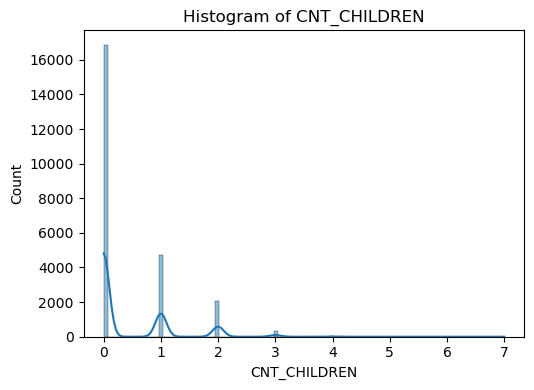

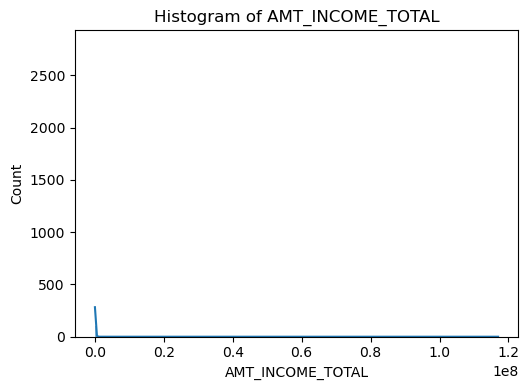

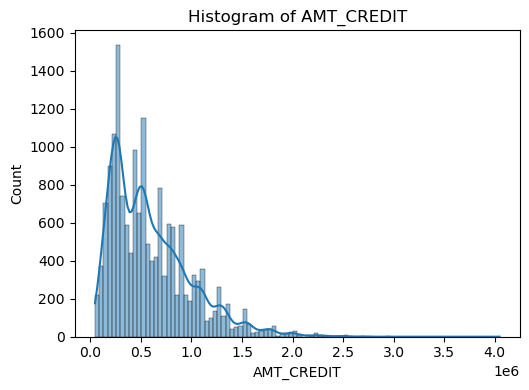

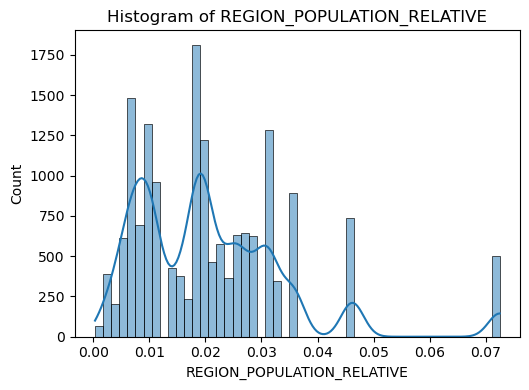

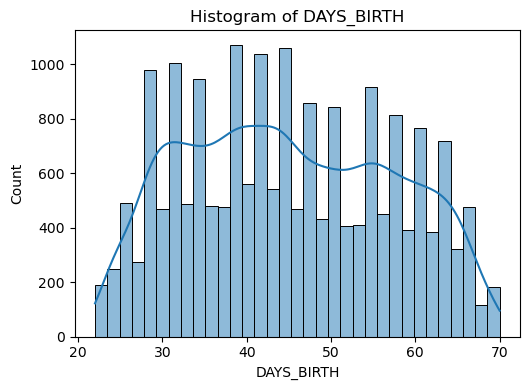

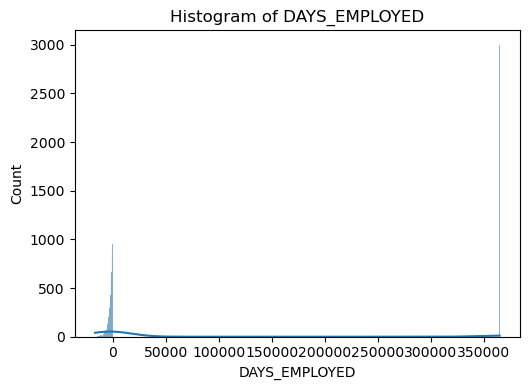

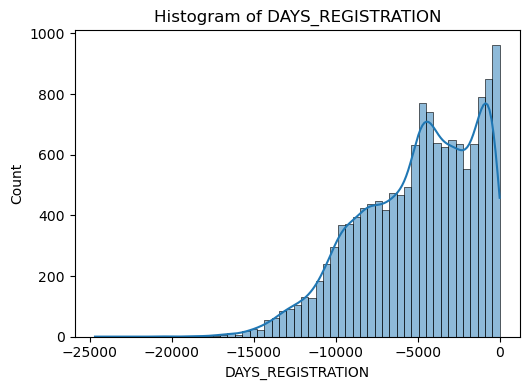

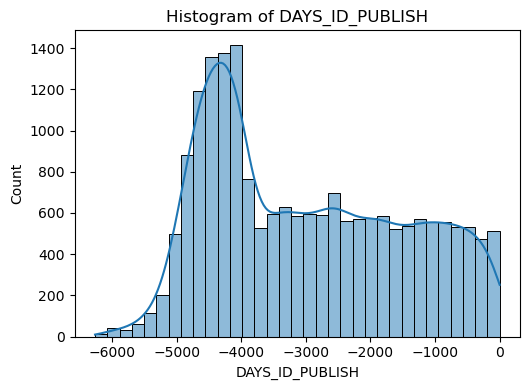

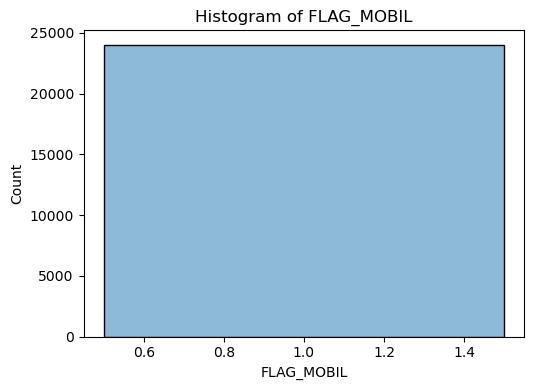

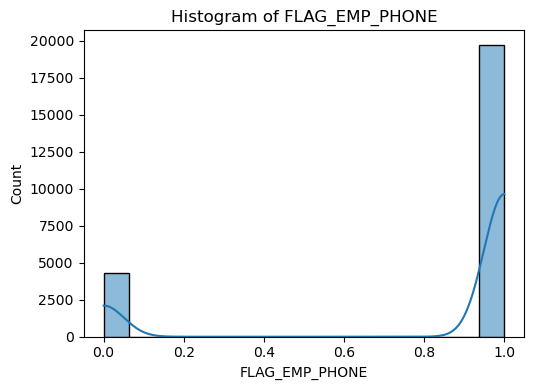

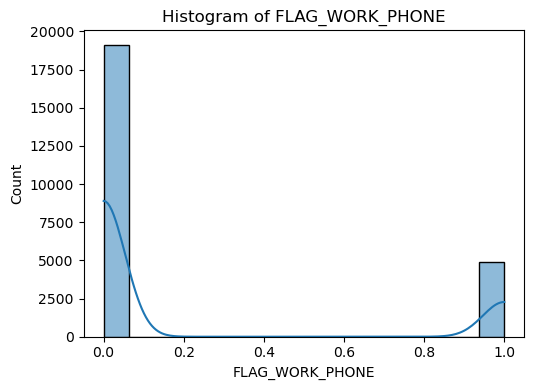

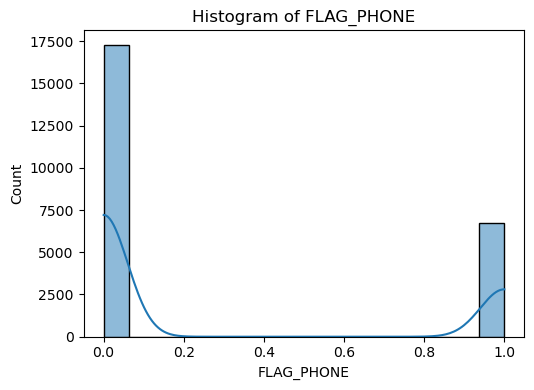

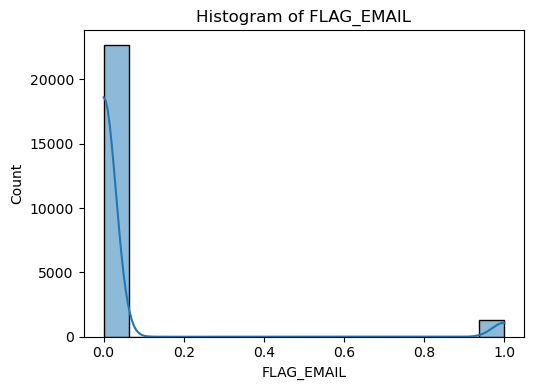

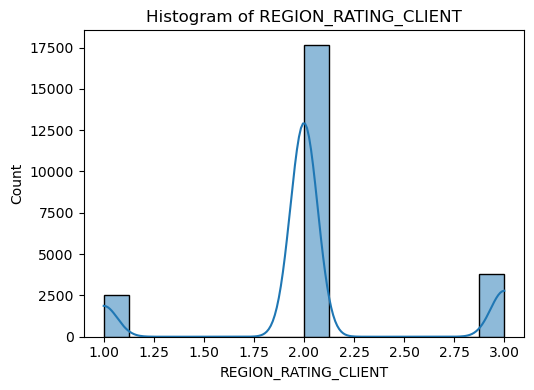

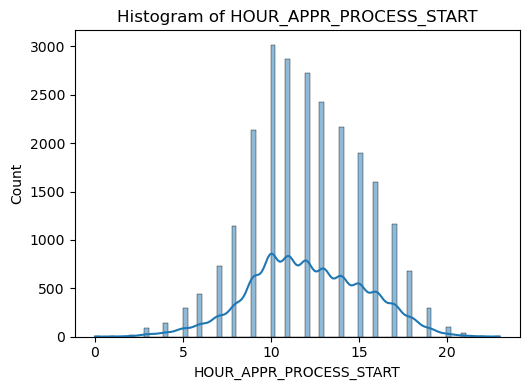

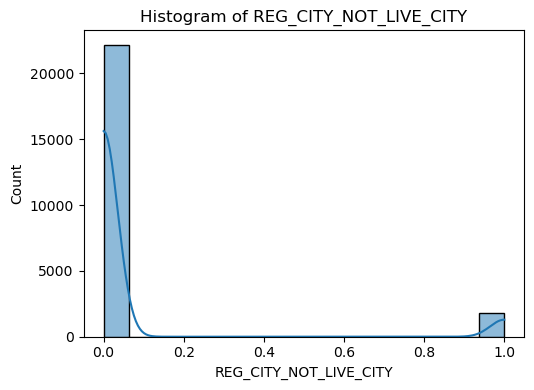

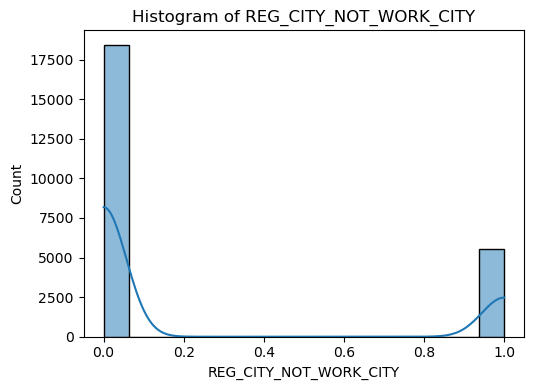

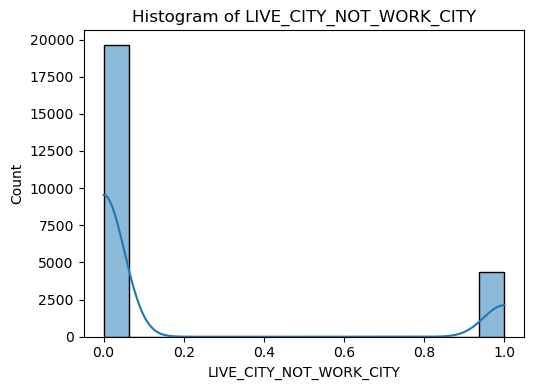

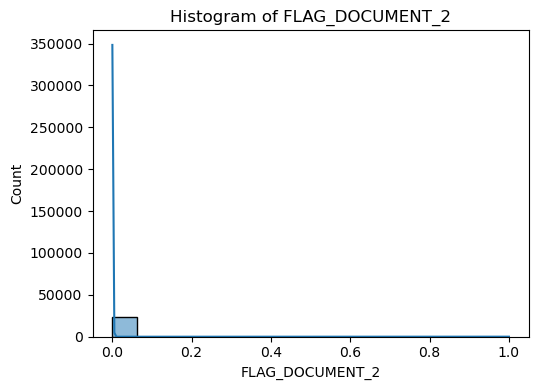

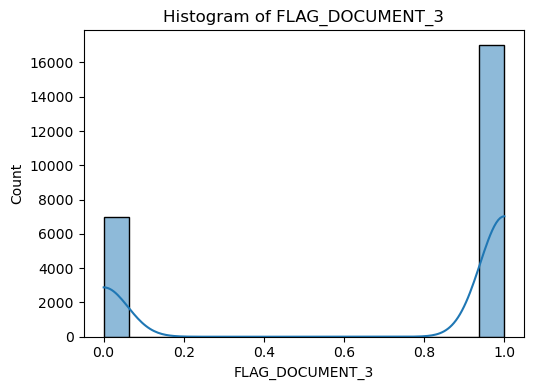

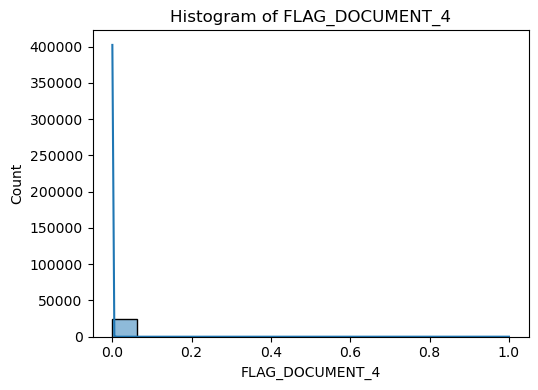

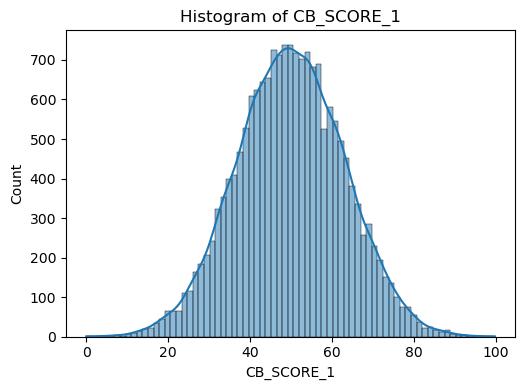

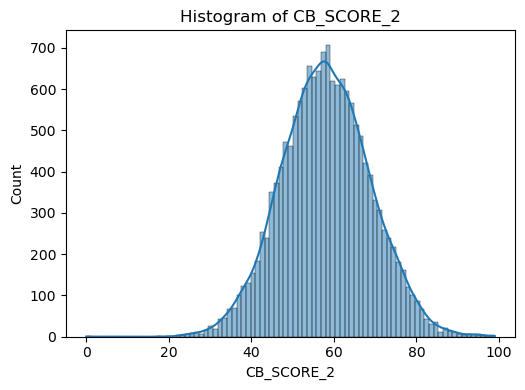

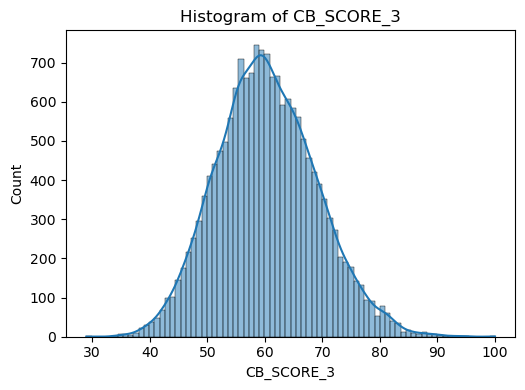

KeyboardInterrupt: 

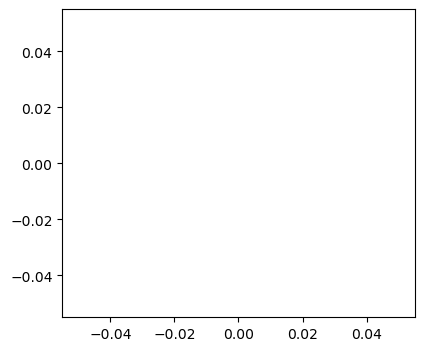

In [85]:
# 수치형 변수 시각화 (히스토그램과 상자 그림)
for column in numeric_columns[1:]:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()


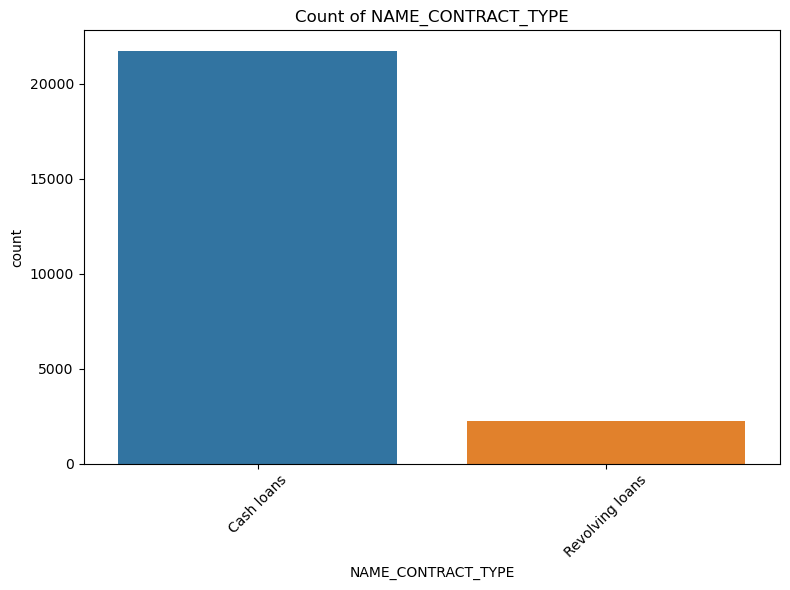

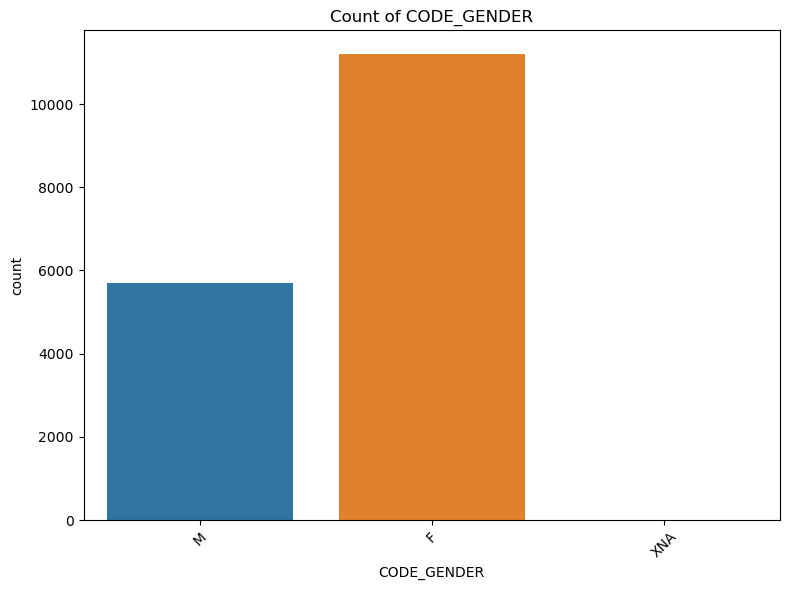

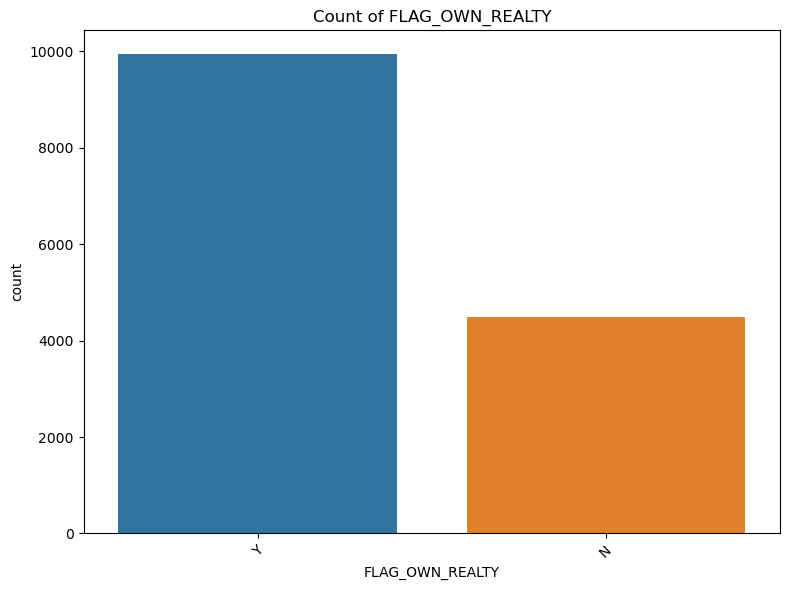

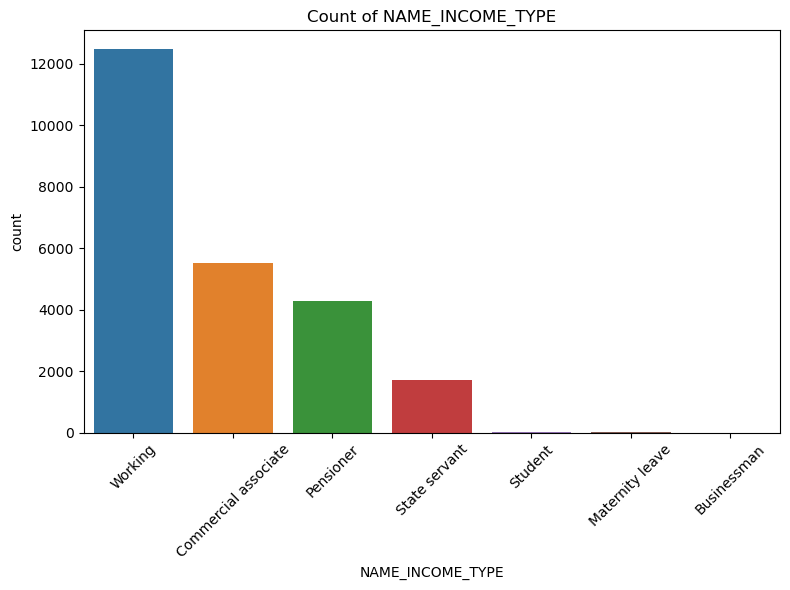

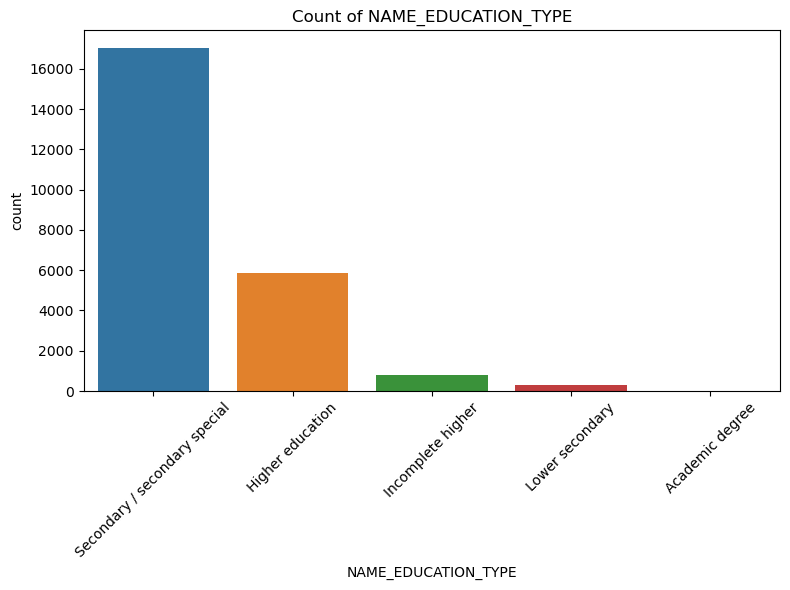

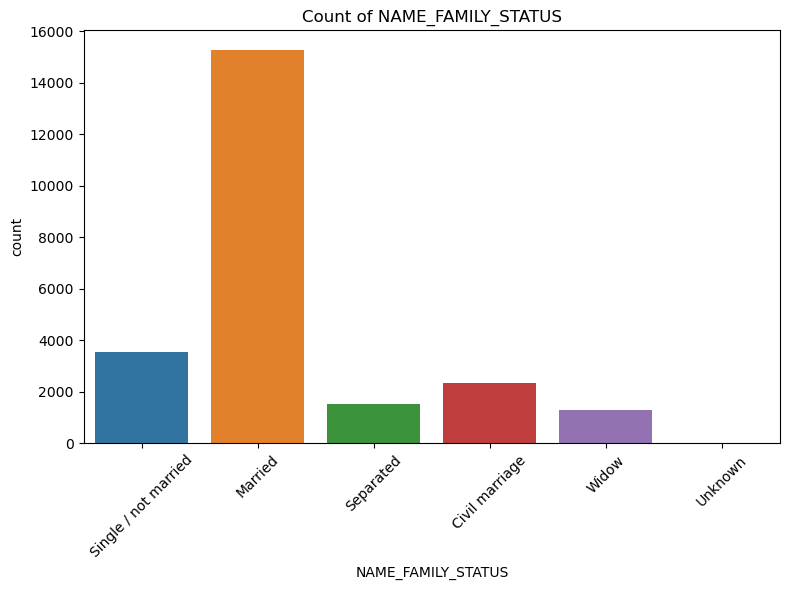

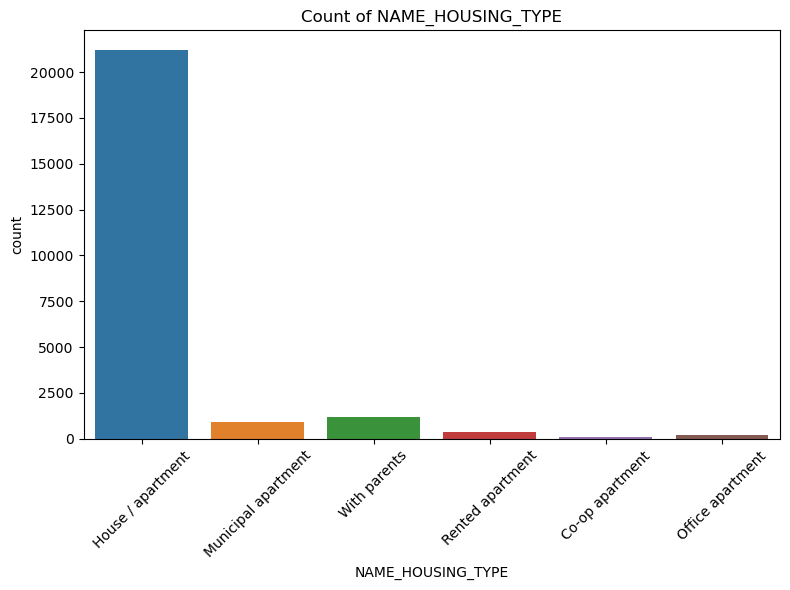

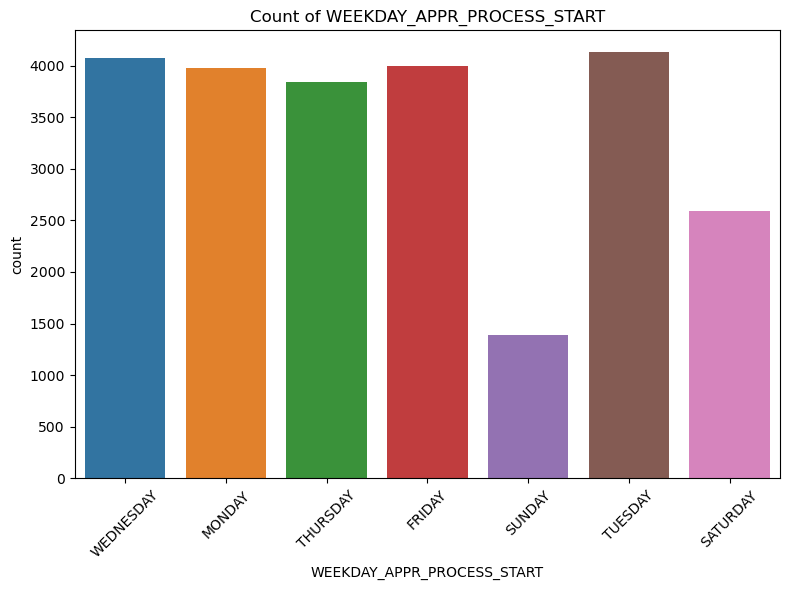

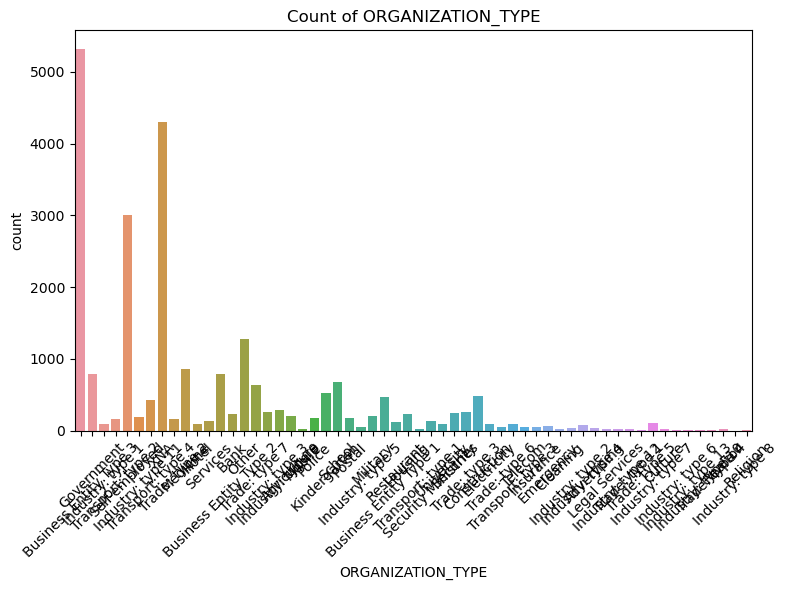

In [ ]:
# 범주형 변수 시각화 (막대 그래프)
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x= data[column] ,data=data[column])
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 다변량 분석

C:\Users\galaxy\AppData\Local\Temp\ipykernel_6204\3722739400.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


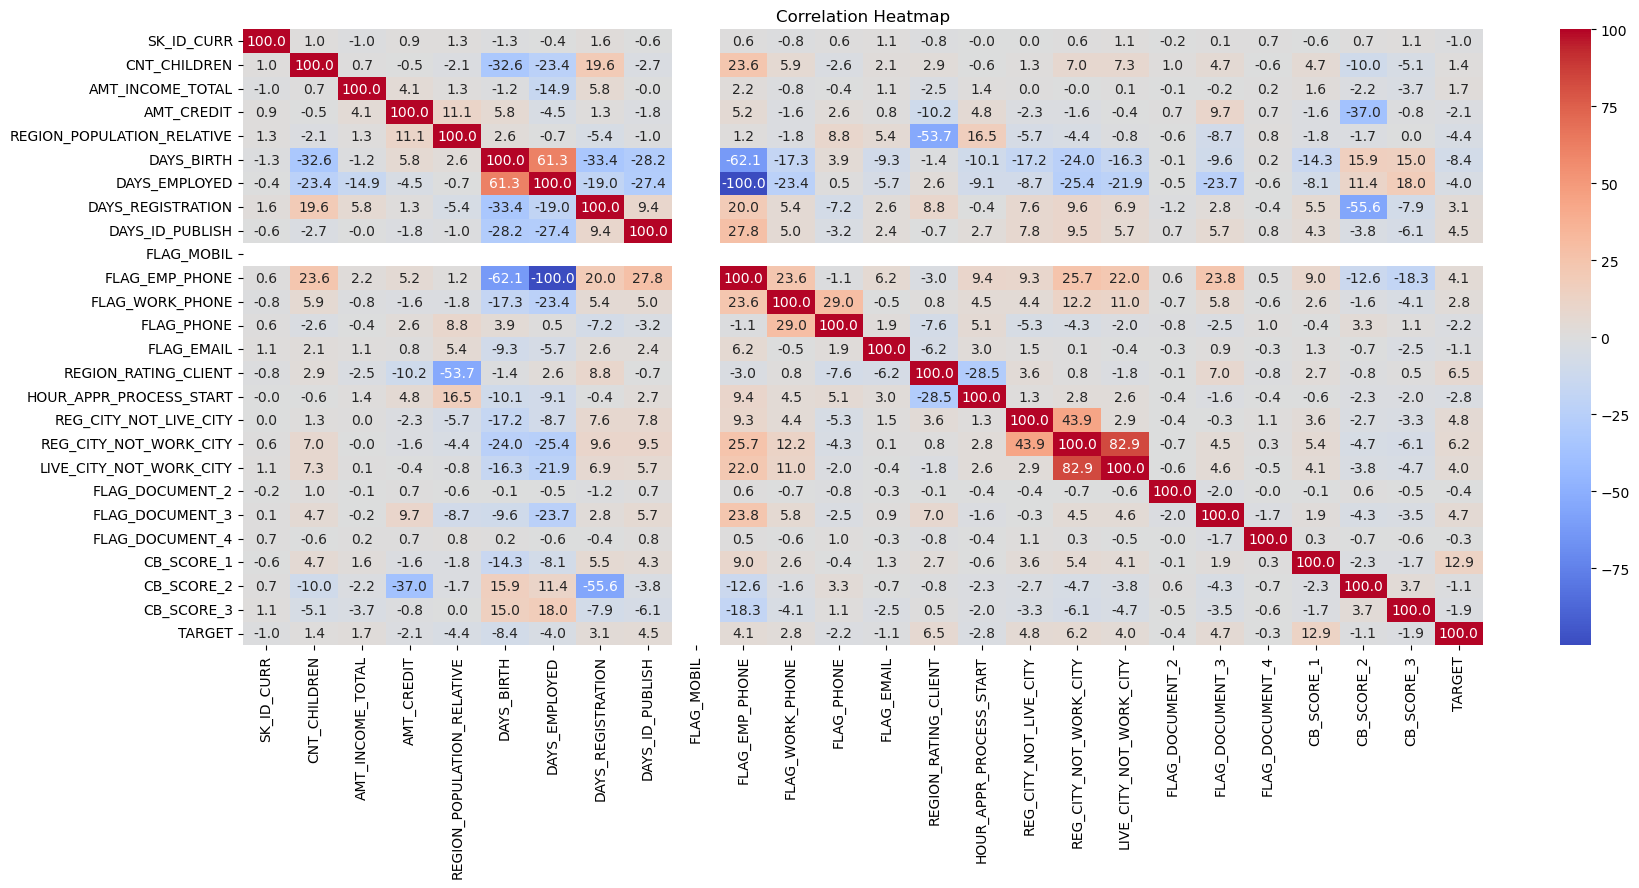

In [ ]:
correlation_matrix = data.corr()
percent_corr_matrix = correlation_matrix * 100
# 히트맵 그리기
plt.figure(figsize=(20, 8))  # 그래프 크기 조정
sns.heatmap(percent_corr_matrix, annot=True,fmt=".1f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")  # 그래프 제목
plt.show()

In [ ]:
data[['FLAG_EMP_PHONE', 'DAYS_EMPLOYED']]
tmp = data.loc[data['FLAG_EMP_PHONE'] == 0, ['FLAG_EMP_PHONE', 'DAYS_EMPLOYED']]
tmp['DAYS_EMPLOYED'].value_counts()

# FLAG_EMP_PHONE  == 0 일떄, DAYS_EMPLOYED 는 365243이라는 값을 만족함.
# 365243을 무직으로 봐도 될 거 같음 값 변경 !!

365243.0    2999
Name: DAYS_EMPLOYED, dtype: int64

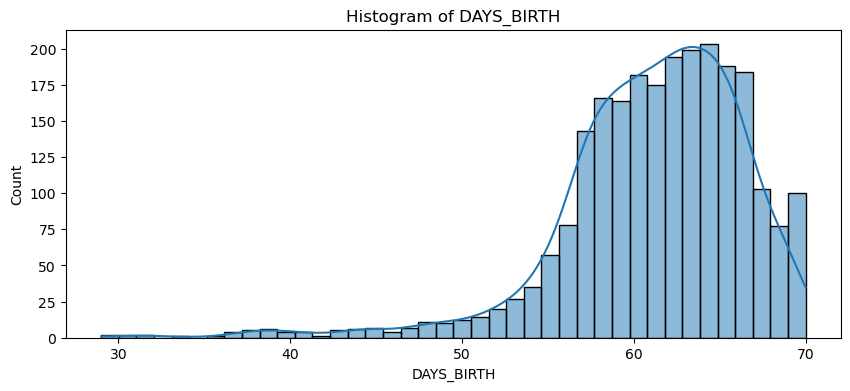

In [ ]:
data[['DAYS_BIRTH', 'DAYS_EMPLOYED']]
tmp = data.loc[data['DAYS_EMPLOYED'] == 365243, ['DAYS_BIRTH', 'DAYS_EMPLOYED']]

tmp['DAYS_BIRTH']
plt.figure(figsize=(10, 4))
sns.histplot(tmp['DAYS_BIRTH'], kde=True)
plt.title(f'Histogram of DAYS_BIRTH')
plt.show()

# 무직자들은 대부분 고령층에 몰려있음?

## 딥러닝 방식으로 결측치 채워보기

In [7]:
# 결측치 확인
print("결측치가 있는 행의 수는",len(data),"중",len(data[data.isnull().any(axis=1)]))
# 대부분의 행이 결측치가 있음
missing_values = data.isnull().sum()
missing_values[missing_values > 0 ]

결측치가 있는 행의 수는 24000 중 23562


CODE_GENDER                   7094
FLAG_OWN_REALTY               9571
AMT_CREDIT                    7300
REGION_POPULATION_RELATIVE    7149
DAYS_BIRTH                    4749
DAYS_EMPLOYED                 7149
DAYS_REGISTRATION             9733
DAYS_ID_PUBLISH               4741
CB_SCORE_1                    6146
CB_SCORE_2                    8274
CB_SCORE_3                    7108
dtype: int64

In [8]:
missing_values = missing_values[missing_values > 0].index.to_list()

In [9]:
numeric_columns = numeric_columns.to_list()
numeric_columns = [x for x in numeric_columns if x not in missing_values]
numeric_columns

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'TARGET']

In [10]:
categorical_columns = categorical_columns.to_list()
categorical_columns = [x for x in categorical_columns if x not in missing_values]
categorical_columns

['NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [11]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# 결측치 있는 데이터 준비
data_with_missing = data.copy()

# 결측치 채우기를 위한 데이터 준비
target_column = 'CODE_GENDER'  # 채울 결측치가 있는 컬럼명
numeric_columns = numeric_columns[1:]

data_with_missing[target_column]
data_with_missing.loc[data_with_missing['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = np.nan
# 결측치가 없는 데이터 추출
no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]

# 입력 데이터 준비
input_data = no_missing_data[list(numeric_columns) + list(categorical_columns)]

# 범주형 변수 인코딩
encoder = OneHotEncoder(drop='first')
categorical_data_encoded = encoder.fit_transform(input_data[categorical_columns]).toarray()


# 모든 입력 데이터 결합
input_data_encoded = np.hstack((input_data[numeric_columns].values, categorical_data_encoded))

# 데이터 스케일링
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data_encoded)

# 결측치를 채울 Autoencoder 모델 구성
input_dim = input_data_scaled.shape[1]



model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='linear')  # 선형 활성화 함수 사용
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


one_hot_train_labels = to_categorical(no_missing_data[target_column].factorize()[0])

# 모델 훈련
model.fit(input_data_scaled, one_hot_train_labels, epochs=20, batch_size=32, validation_split=0.2)



Epoch 1/20
423/423 [==============================] - 2s 2ms/step - loss: 0.6971 - accuracy: 0.3189 - val_loss: 0.5824 - val_accuracy: 0.3041
Epoch 2/20
423/423 [==============================] - 1s 2ms/step - loss: 0.6012 - accuracy: 0.2809 - val_loss: 0.6033 - val_accuracy: 0.2940
Epoch 3/20
423/423 [==============================] - 1s 2ms/step - loss: 0.5939 - accuracy: 0.2735 - val_loss: 0.6295 - val_accuracy: 0.2910
Epoch 4/20
423/423 [==============================] - 1s 2ms/step - loss: 0.5850 - accuracy: 0.2668 - val_loss: 0.5972 - val_accuracy: 0.2899
Epoch 5/20
423/423 [==============================] - 1s 2ms/step - loss: 0.5805 - accuracy: 0.2634 - val_loss: 0.5962 - val_accuracy: 0.2872
Epoch 6/20
423/423 [==============================] - 1s 2ms/step - loss: 0.5740 - accuracy: 0.2609 - val_loss: 0.5984 - val_accuracy: 0.2904
Epoch 7/20
423/423 [==============================] - 1s 2ms/step - loss: 0.5626 - accuracy: 0.2567 - val_loss: 0.6022 - val_accuracy: 0.2916
Epoch 

In [ ]:
# 훈련된 모델로 결측치 예측 및 채우기
predicted_values = model.predict(input_data_scaled)
filled_values = predicted_values.squeeze()

# 결측치를 채워 넣음
data_with_missing.loc[missing_data.index, target_column] = filled_values

print(data_with_missing)

In [ ]:
set(no_missing_data[target_column])

{'F', 'M', 'XNA'}

In [ ]:
missing_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2',
       'CB_SCORE_3', 'TARGET'],
      dtype='object')